In [24]:
using Pkg
import Plots: Plot, plot, scatter!
Pkg.activate(".")
import PowerModels as PM
import MathOptInterface as MOI
import JSON 
import Glob
using LinearAlgebra: cond
using Plots
const SOLVED_STATUSES = [MOI.OPTIMAL, MOI.LOCALLY_SOLVED, MOI.ALMOST_OPTIMAL, MOI.ALMOST_LOCALLY_SOLVED]
include("utils.jl")
PM.silence()

  Activating project at `~/Documents/Projects/pfdelta_submitted/pfdelta/data_generation`


In [25]:
samples_path = "../data/case2000/n/close2inf_all"
solved_cases_path = joinpath(samples_path, "raw")
sample_nums = [1, 5, 110, 97]

files = Dict(
    sample => begin
        all_files = Glob.glob("sample_$(sample)_*.m", solved_cases_path)
        all_files[max(end-20, 1):end-1]   # last 20, excluding the very last
    end
    for sample in sample_nums
)

# Initialize results dict
results = Dict{Int64, Vector{Tuple}}()

Dict{Int64, Vector{Tuple}}()

In [26]:
files[1]

20-element Vector{String}:
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31374.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31389.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31404.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31419.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31433.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31447.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31460.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31473.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31486.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31497.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31509.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31519.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31529.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31538.m"
 "../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31546.m"
 "../data/case2000/n/close2i

In [27]:
for sample in sample_nums
    sample_results = Tuple[]
    for file in files[sample]
        println("working on file: $file")
        m = match(r"lam_(\d+p\d+)", basename(file))  # strip path
        lam = parse(Float64, replace(m.captures[1], "p" => "."))
        net = PM.parse_file(file)
        net = PM.make_basic_network(net)
        cond_num = get_condition_num_NR(net)
        pf_solution, converged, solve_time = get_NR_data(net)
        max_solution_diff = get_solution_diff(net, pf_solution, converged)

        push!(sample_results, (lam, cond_num, converged, solve_time, max_solution_diff, pf_solution, net))
    end
    results[sample] = sample_results
end

working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31374.m
working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31389.m
working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31404.m
working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31419.m
working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31433.m
working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31447.m
working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31460.m
working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31473.m
working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31486.m
working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31497.m
working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31509.m
working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31519.m
working on file: ../data/case2000/n/close2inf_all/raw/sample_1_lam_0p31529.m

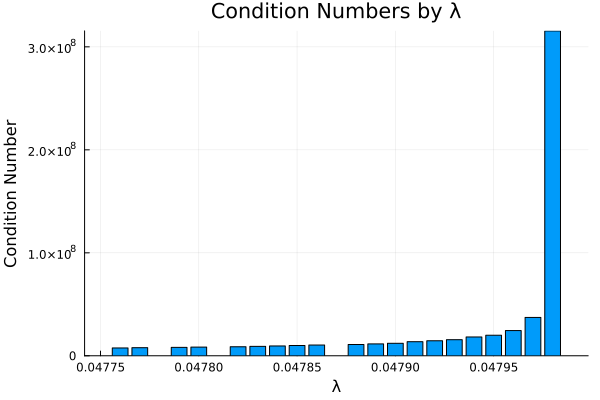

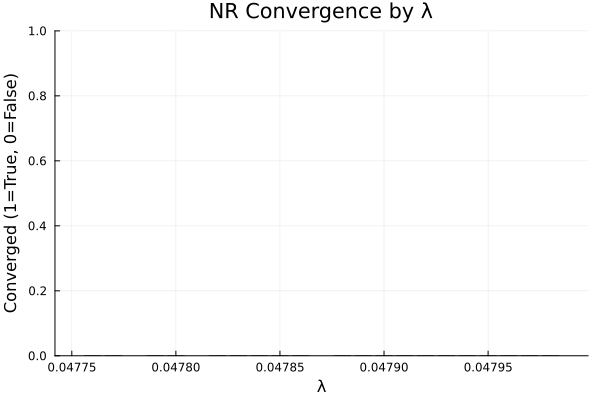

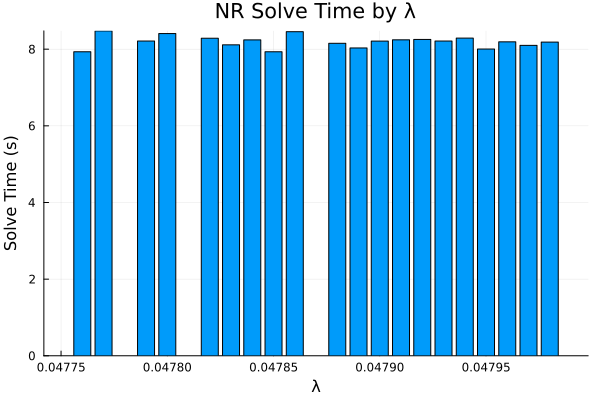

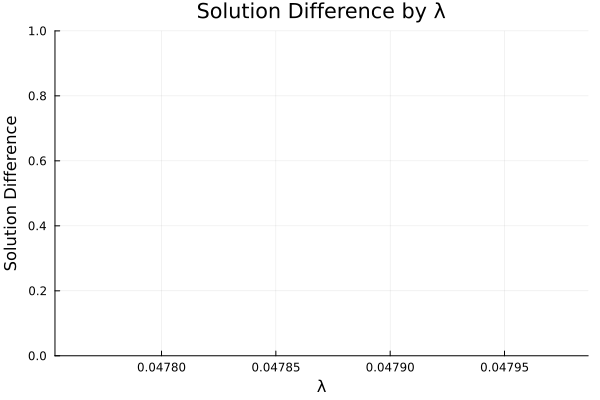

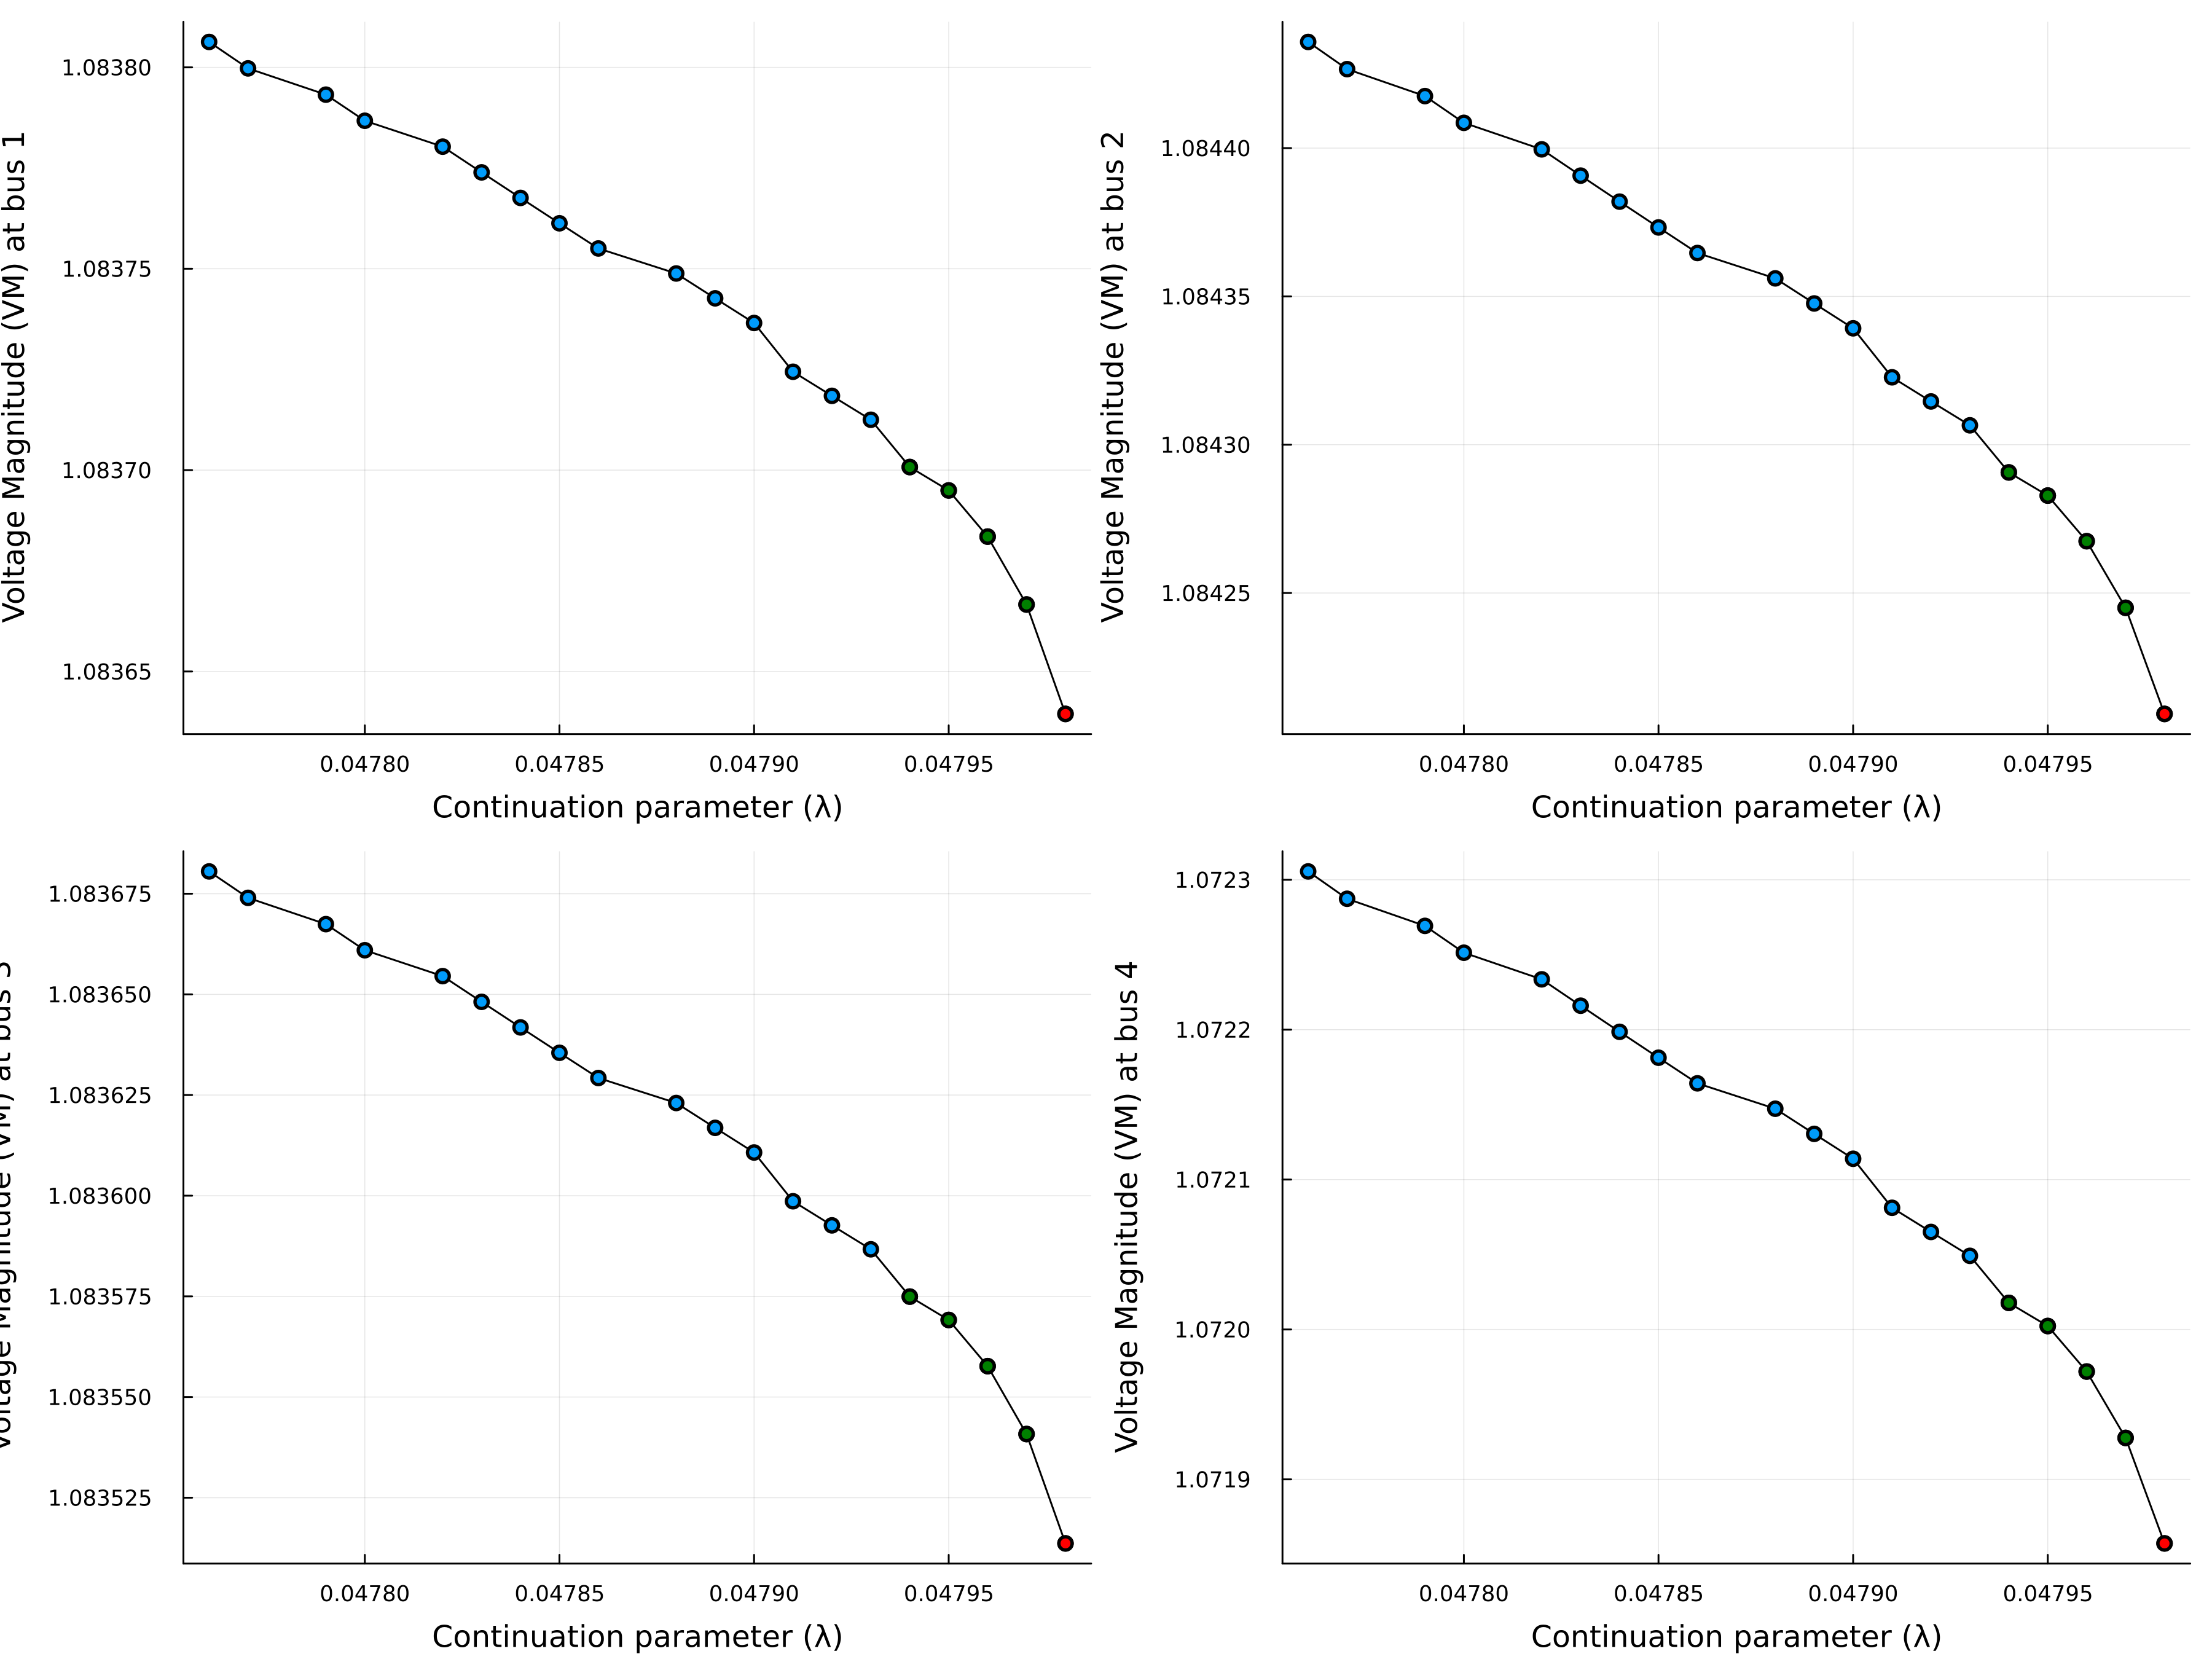

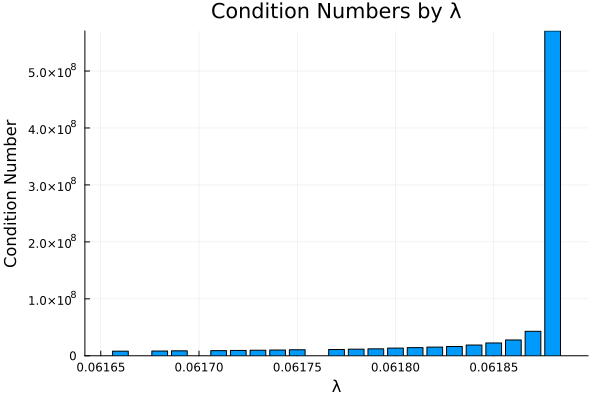

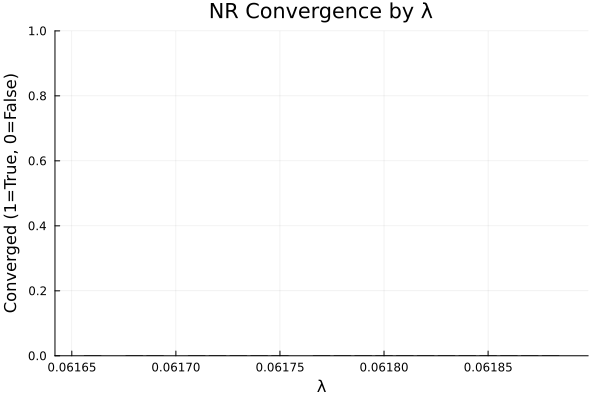

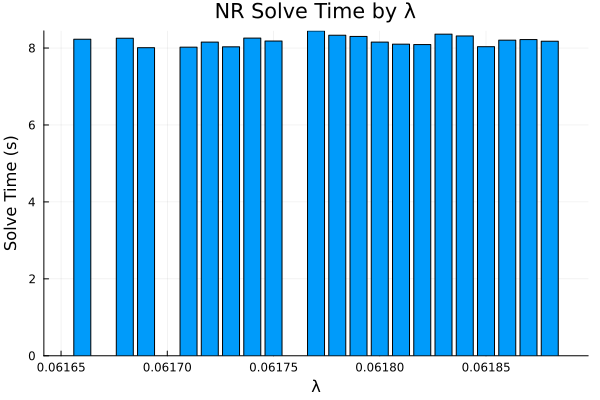

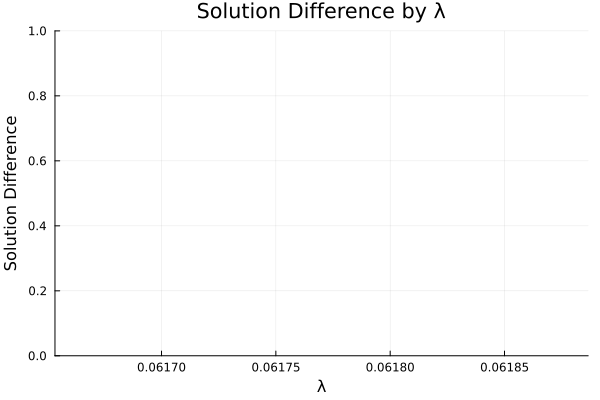

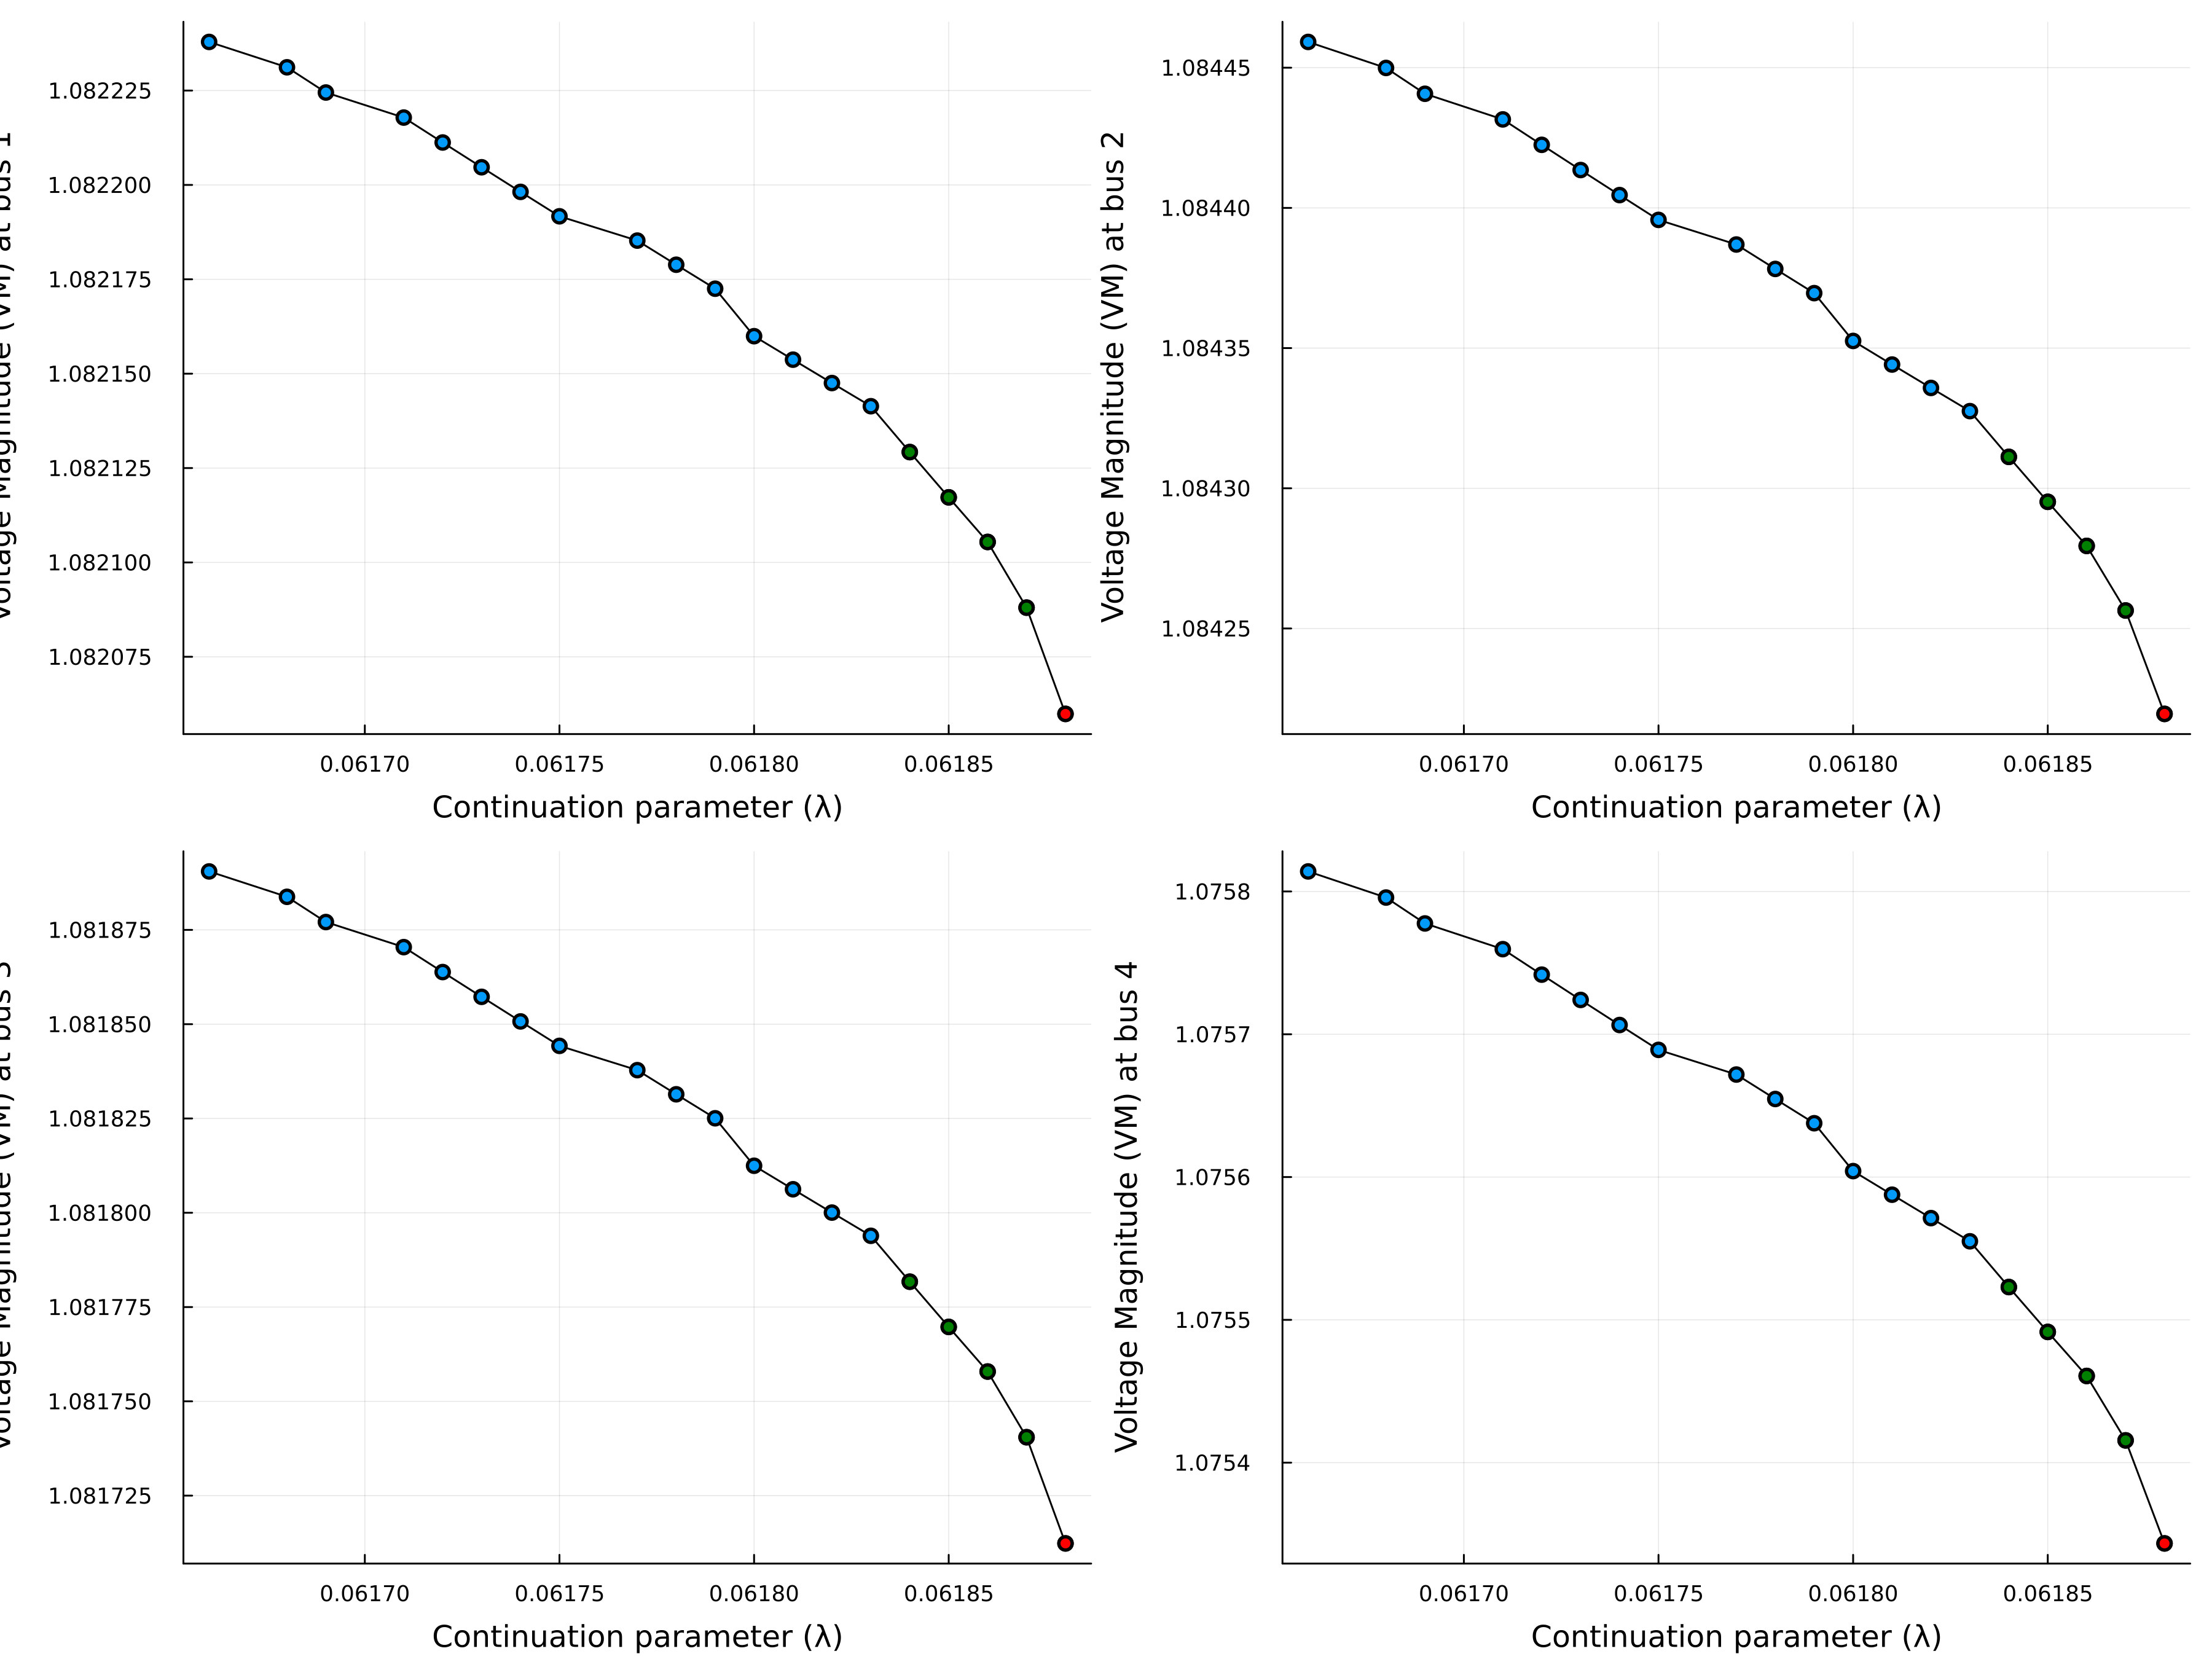

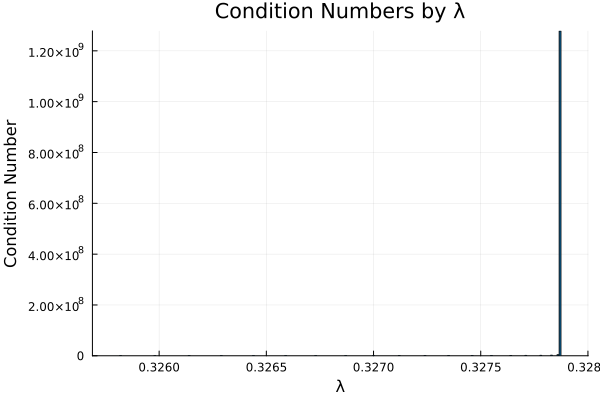

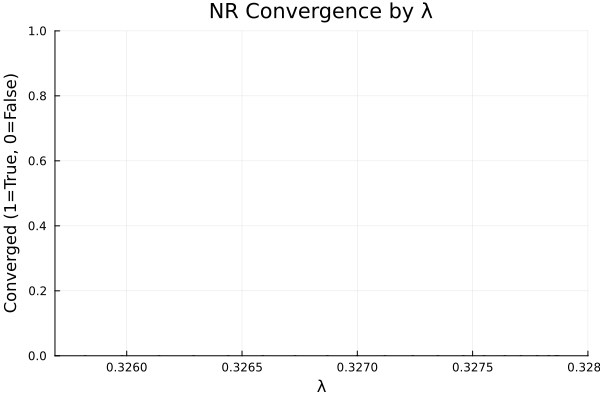

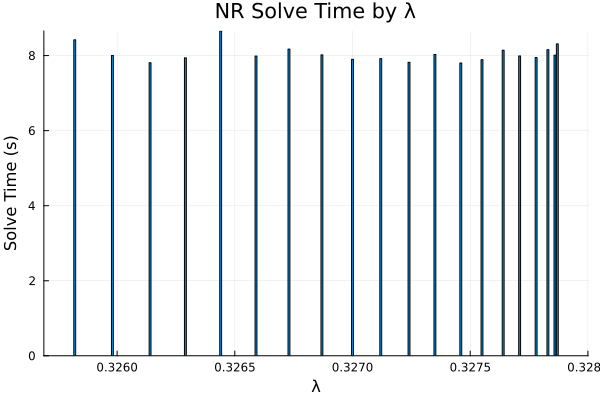

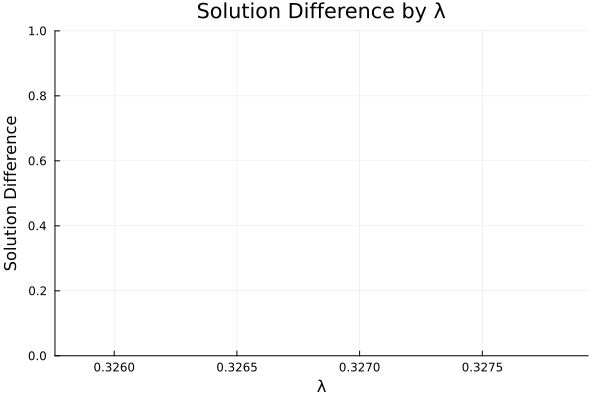

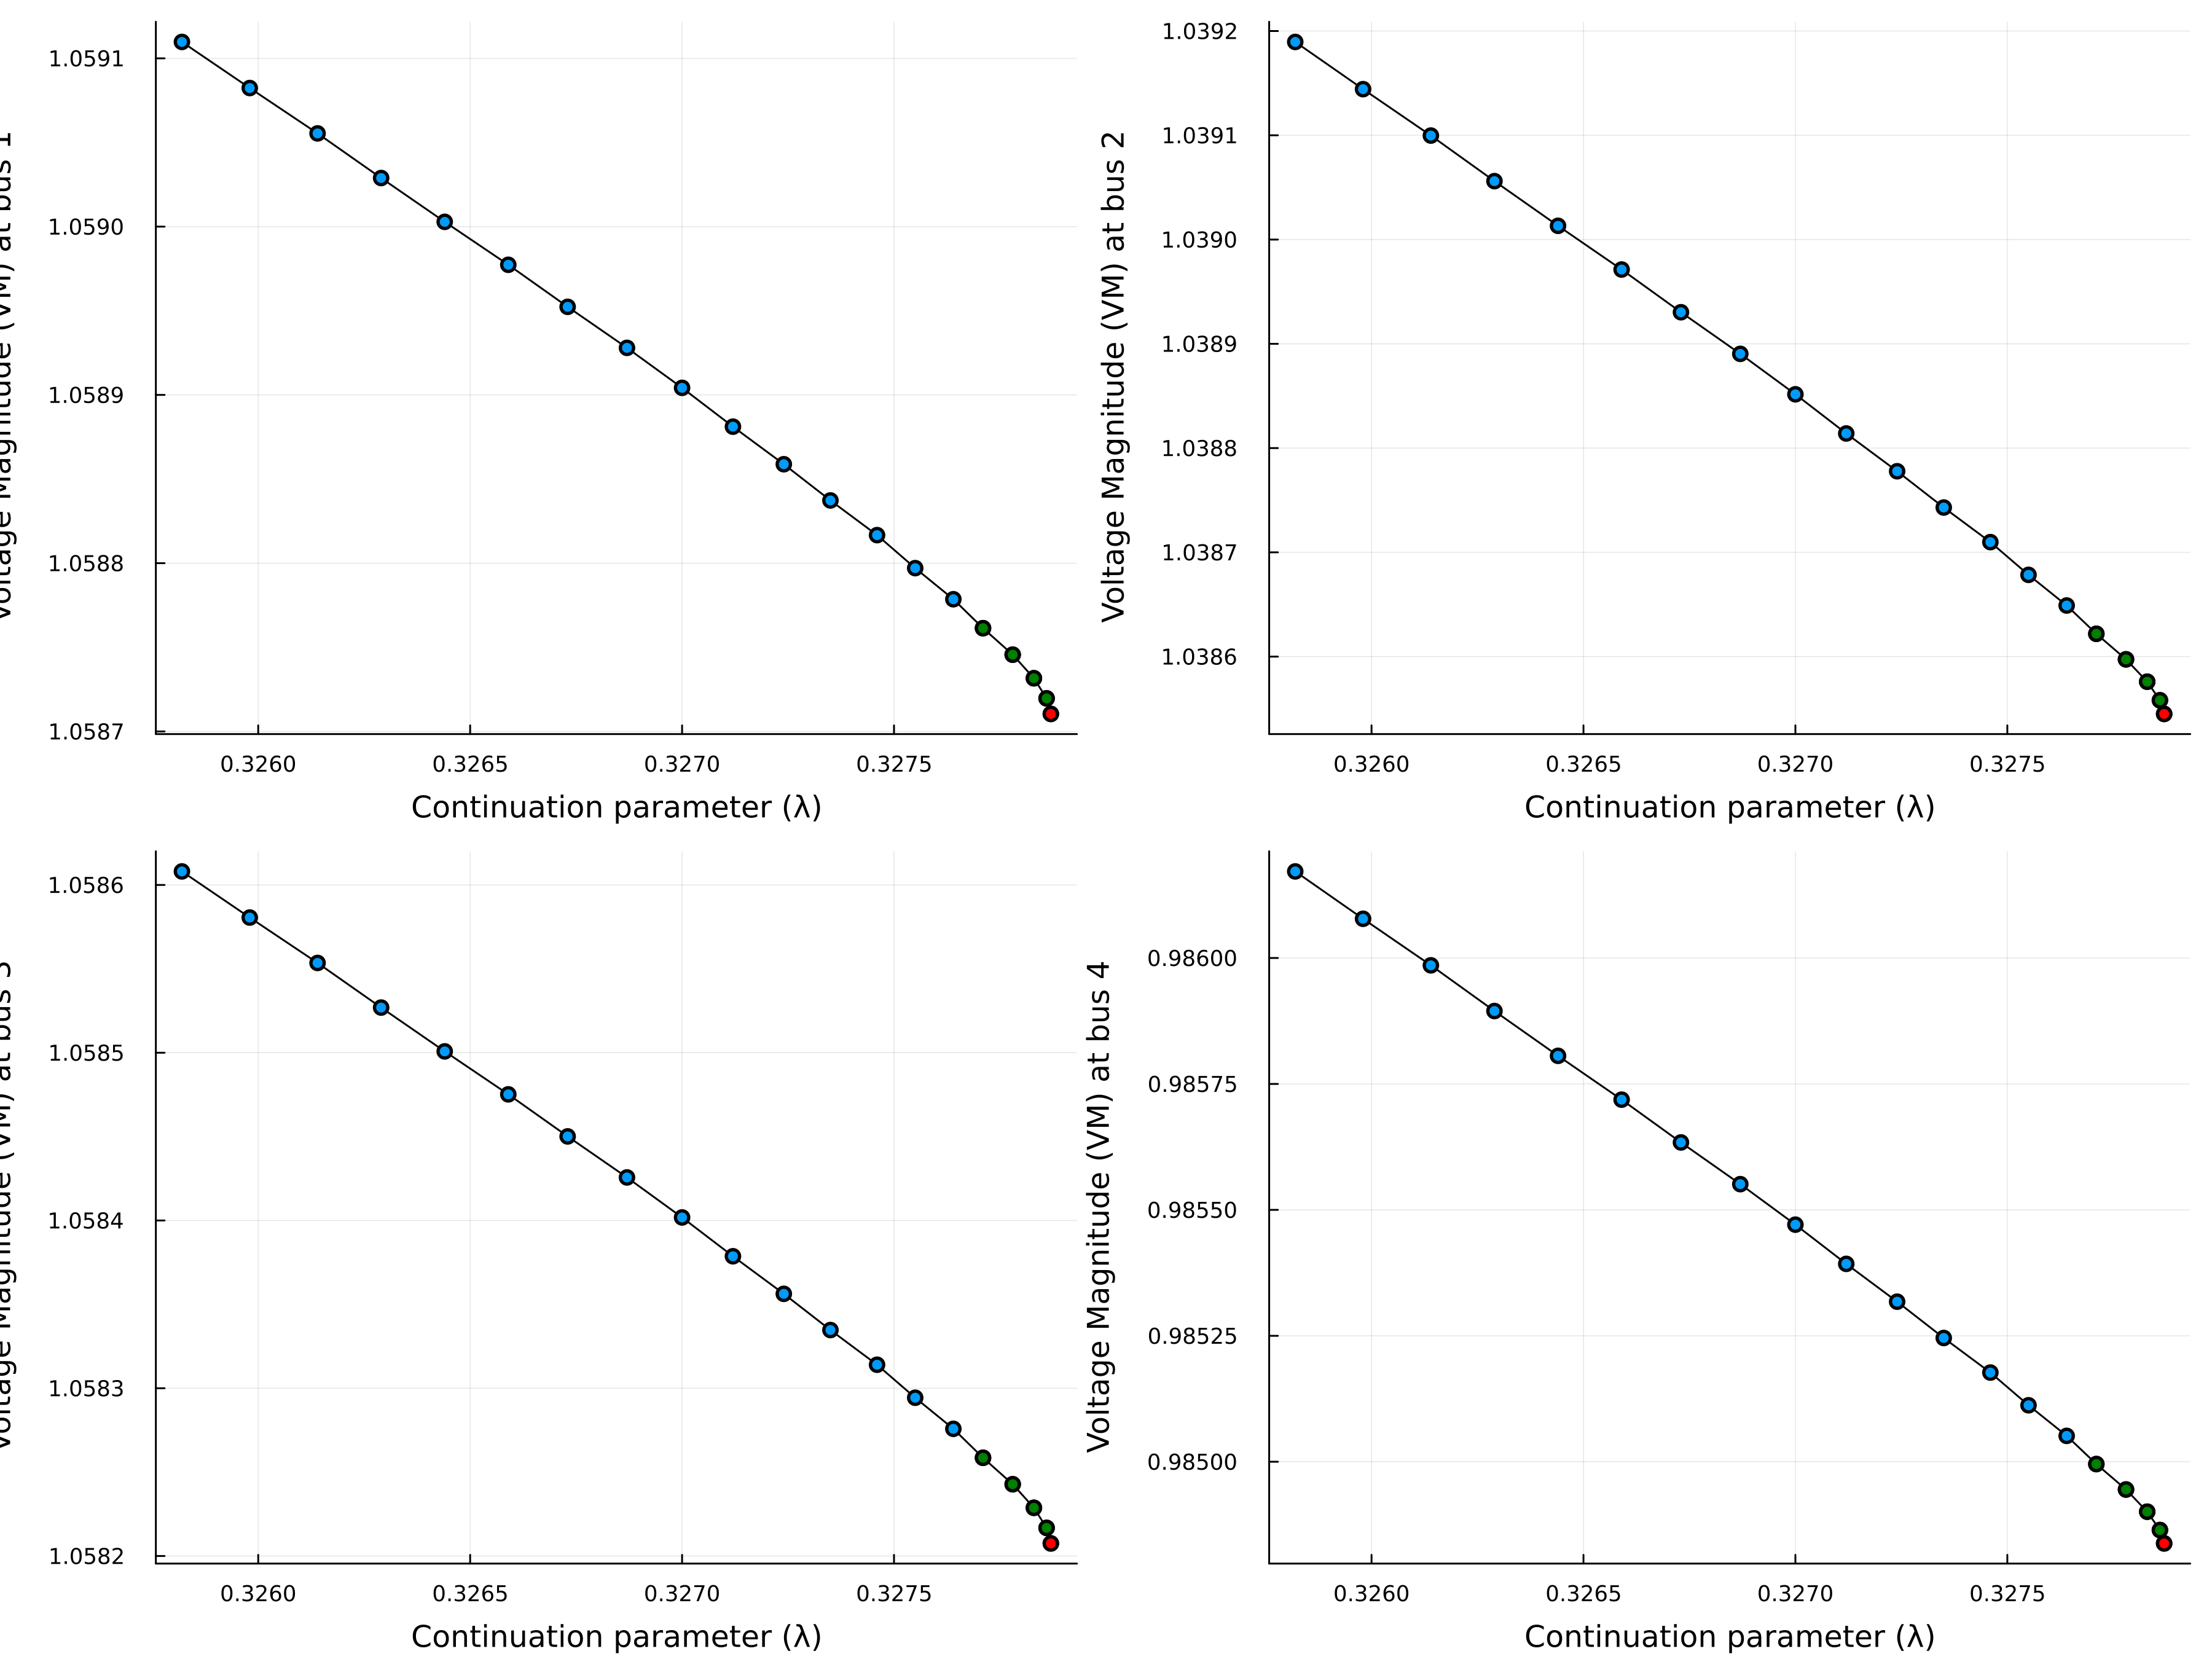

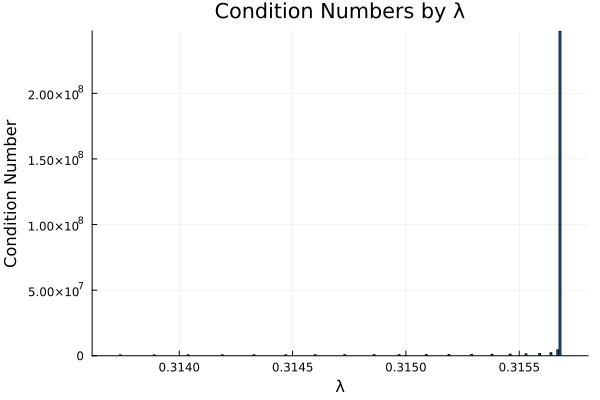

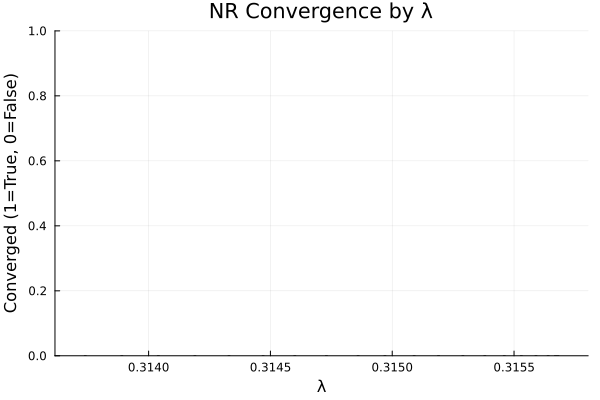

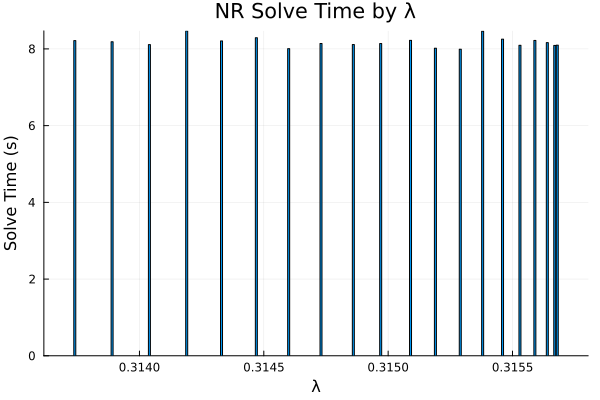

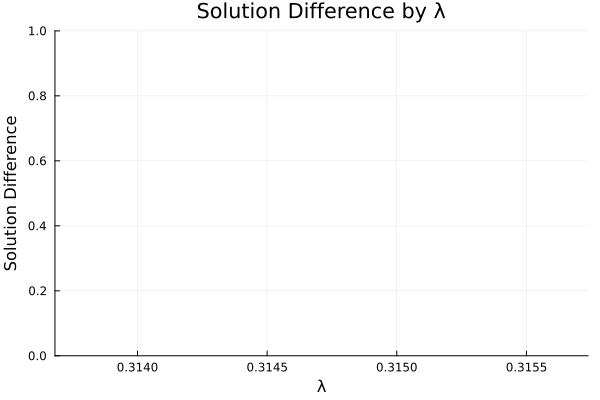

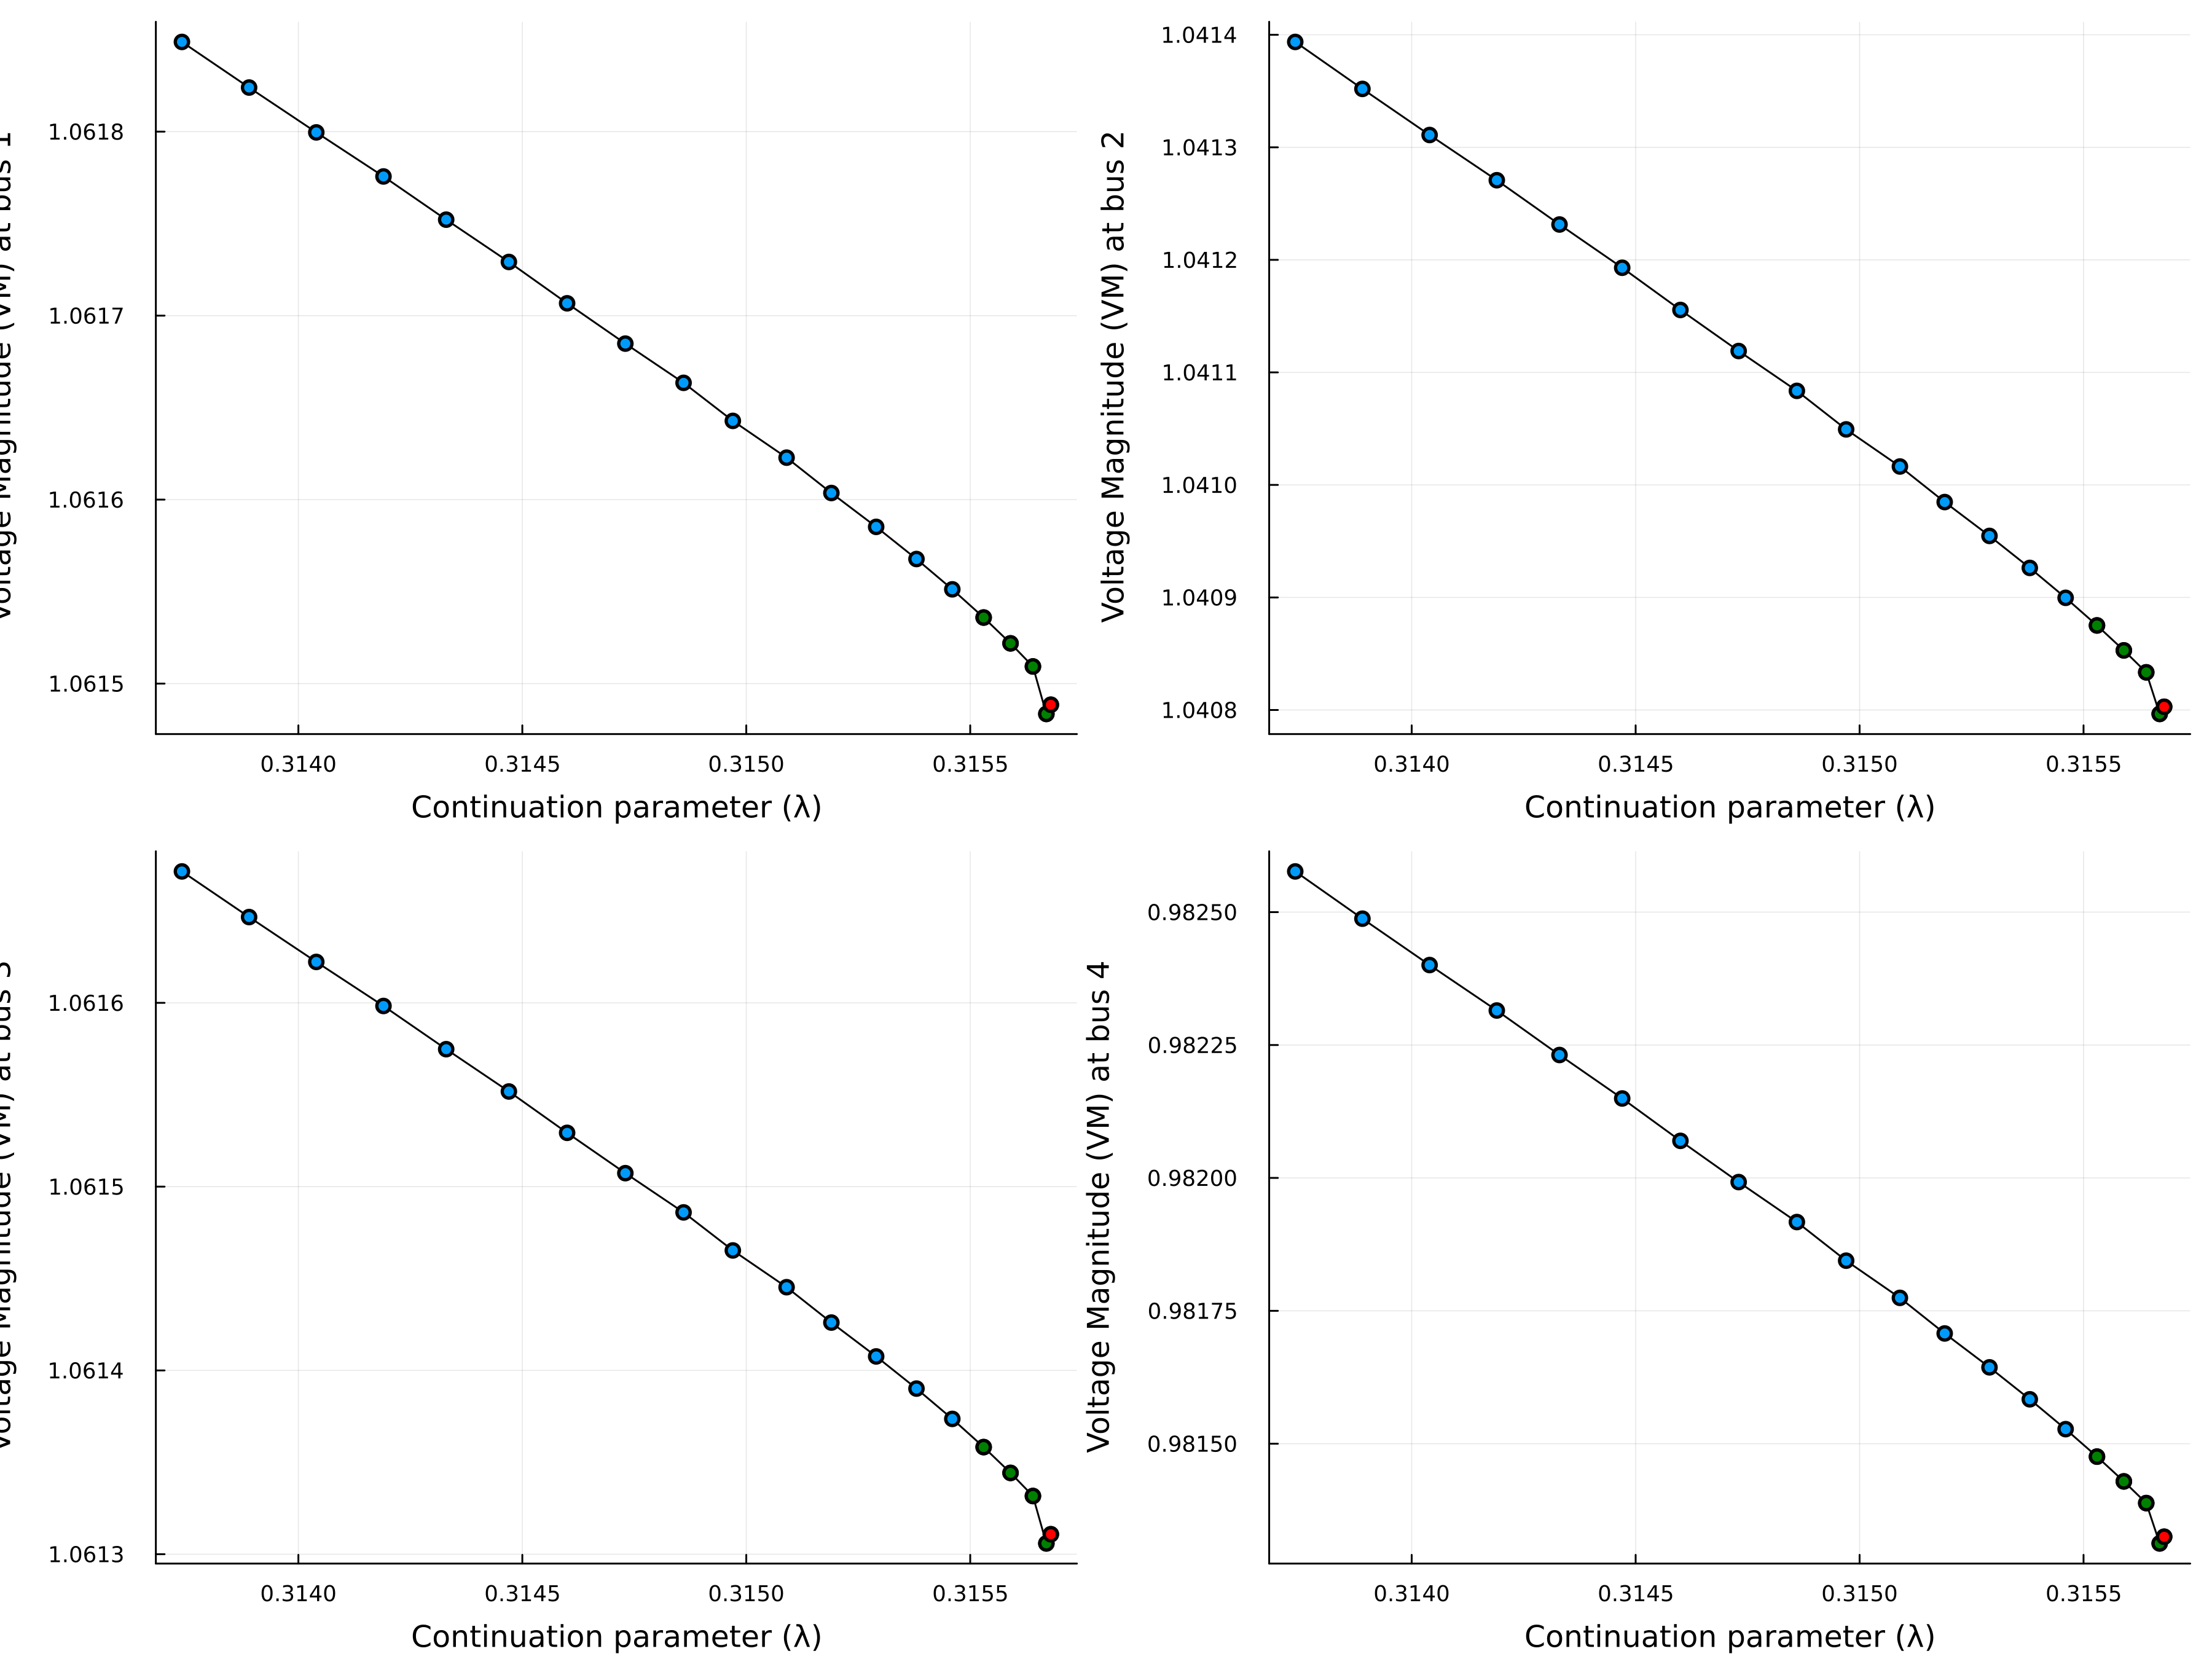

In [28]:
# Plot NR data
for sample in keys(results)
    sample_results = results[sample]
    display(plot_condition_numbers(sample_results))
    display(plot_NR_convergence(sample_results))
    display(plot_NR_solve_time(sample_results))
    display(plot_solution_difference(sample_results))
    display(plot_PV_curves(sample_results, ["1","2","3","4"]))
end